<a href="https://colab.research.google.com/github/DianaTorresV/Time_Series_Forecasting_Project/blob/main/Week_1_Project_Corporaci%C3%B3n_Favorita_Grocery_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Times Series Forescasting Project

#Week 1


*   Data Preparation: Readed it in in chunks and filtered it out by only including the stores that are in the "Guayas" region. Filter: Selected only Top 3 families by the number of items.


*   Data Exploration:missing values, missing dates, structure
*   EDA for the choosen region "Guayas"
*   Feature engineering: From Date column extract:
    * Days
    * Months
    * Years
  
* Visualizing Time-Series Data
    * Sales Over Time (Aggregated)
    * Sales Trend by Year and Month
    * Examining the Impact of Holidays
    * Analyzing Perishable Items
    








In [1]:
#Import Libraries
import pandas as pd
from matplotlib import pyplot as plt


#Week 1 Development

##Data Preparation

In [2]:
#Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Load the CSV files to Pandas Dataframes
df_stores = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/stores.csv')
# Load the CSV files into pandas DataFrames
df_items = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/items.csv')
df_transactions = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/transactions.csv')
df_oil = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/oil.csv')
df_holidays_events = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/holidays_events.csv')

# Note: train file is very large.
# To make sure we fit RAM avaible on Google-Colab, we will load only part of the file
df_train = pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/train.csv', nrows=2e6)

In [4]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [5]:
df_stores.loc[df_stores.state=='Guayas']

,store_nbr,city,state,type,cluster
23,24,Guayaquil,Guayas,D,1
25,26,Guayaquil,Guayas,D,10
26,27,Daule,Guayas,D,1
27,28,Guayaquil,Guayas,E,10
28,29,Guayaquil,Guayas,E,10
29,30,Guayaquil,Guayas,C,3
31,32,Guayaquil,Guayas,C,3
33,34,Guayaquil,Guayas,B,6
34,35,Playas,Guayas,C,3
35,36,Libertad,Guayas,E,10


In [6]:
df_stores.loc[df_stores['state']=='Guayas']

,store_nbr,city,state,type,cluster
23,24,Guayaquil,Guayas,D,1
25,26,Guayaquil,Guayas,D,10
26,27,Daule,Guayas,D,1
27,28,Guayaquil,Guayas,E,10
28,29,Guayaquil,Guayas,E,10
29,30,Guayaquil,Guayas,C,3
31,32,Guayaquil,Guayas,C,3
33,34,Guayaquil,Guayas,B,6
34,35,Playas,Guayas,C,3
35,36,Libertad,Guayas,E,10


In [7]:
# Select list of stores located in the 'Guayas' region
store_ids = df_stores[df_stores['state'] == 'Guayas']['store_nbr'].unique()
store_ids


array([24, 26, 27, 28, 29, 30, 32, 34, 35, 36, 51])

In [8]:
df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [9]:
# Initialize an empty list to hold filtered chunks
filtered_chunks = []

# Define the chunk size (number of rows per chunk)
chunk_size = 10 ** 6  # Adjust based on your system's memory capacity

# Read the CSV file in chunks
for chunk in pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/train.csv', chunksize=chunk_size):
  print(chunk.shape)
  break

(1000000, 6)


In [10]:
# Initialize an empty list to hold filtered chunks
filtered_chunks = []

# Define the chunk size (number of rows per chunk)
chunk_size = 10 ** 6  # Adjust based on your system's memory capacity

# Read the CSV file in chunks
for chunk in pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/train.csv', chunksize=chunk_size):
   # Filter the chunk for the desired store IDs
    chunk_filtered = chunk[chunk['store_nbr'].isin(store_ids)]
    # Append the filtered chunk to the list
    filtered_chunks.append(chunk_filtered)
    # Optional: Delete the chunk to free up memory
    del chunk

# Concatenate all filtered chunks into a single DataFrame
df_train = pd.concat(filtered_chunks, ignore_index=True)

# Clean up to free memory
del filtered_chunks

<ipython-input-10-a5615a6384e9>:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('/content/drive/MyDrive/favorita-grocery-sales-forecasting/train.csv', chunksize=chunk_size):


In [11]:
df_train.shape

(22941656, 6)

In [12]:
df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,18789,2013-01-02,24,103665,6.0,NaN
1,18790,2013-01-02,24,105574,12.0,NaN
2,18791,2013-01-02,24,105575,2.0,NaN
3,18792,2013-01-02,24,105577,1.0,NaN
4,18793,2013-01-02,24,105693,7.0,NaN


####The further filtering that we suggest would be selecting only Top 3 families by the number of items.

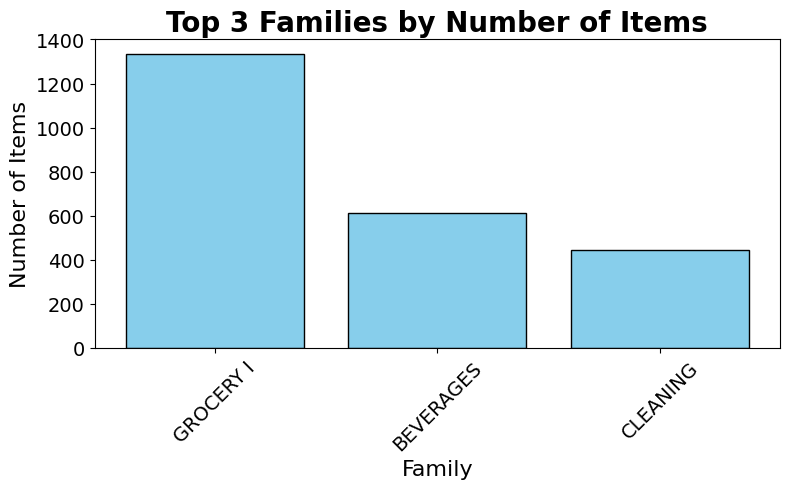

In [13]:
# Plotting the number of items per family (for top 3 families only)
# Compute the number of items per family and select the top 3 families
items_per_family = df_items['family'].value_counts().reset_index()
items_per_family.columns = ['Family', 'Item Count']
top_3_families = items_per_family.head(3)  # Keep only the top 3 families

# Plot the top 3 families
plt.figure(figsize=(8, 5))
plt.bar(top_3_families['Family'], top_3_families['Item Count'], color='skyblue', edgecolor='black')
plt.title("Top 3 Families by Number of Items", fontsize=20, fontweight='bold')
plt.xlabel("Family", fontsize=16)
plt.ylabel("Number of Items", fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()
# Display the plot
plt.show()

In [14]:
# Next, we filter our the dataset
item_ids = df_items[df_items['family'].isin(top_3_families['Family'].unique())]['item_nbr'].unique()
df_train = df_train[df_train['item_nbr'].isin(item_ids)]
df_train.shape

(14745768, 6)

In [15]:
# Checking missing values
df_train.isnull().sum()

,0
id,0
date,0
store_nbr,0
item_nbr,0
unit_sales,0
onpromotion,2747275


In [16]:
#Different values of the column 'onpromotion'
df_train['onpromotion'].unique()

array([nan, False, True], dtype=object)

In [17]:
# Focusing on missing values in the 'onpromotion' column
df_train['onpromotion'] = df_train['onpromotion'].fillna(False).astype(bool)

<ipython-input-17-7bdead4240c5>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['onpromotion'] = df_train['onpromotion'].fillna(False).astype(bool)


##Data Exploration

Next we check all the tables and identify missing values.

In [18]:
df_train.isnull().sum()

,0
id,0
date,0
store_nbr,0
item_nbr,0
unit_sales,0
onpromotion,0


In [19]:
df_train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
1,18790,2013-01-02,24,105574,12.0,False
2,18791,2013-01-02,24,105575,2.0,False
3,18792,2013-01-02,24,105577,1.0,False
4,18793,2013-01-02,24,105693,7.0,False
5,18794,2013-01-02,24,105737,17.0,False


In [20]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [21]:
df_stores.isnull().sum()

,0
store_nbr,0
city,0
state,0
type,0
cluster,0


In [22]:
df_items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [23]:
df_items.isnull().sum()

,0
item_nbr,0
family,0
class,0
perishable,0


In [24]:
df_transactions.isnull().sum()

,0
date,0
store_nbr,0
transactions,0


In [25]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [26]:
df_oil.isnull().sum()

,0
date,0
dcoilwtico,43


In [27]:
df_holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [28]:
df_holidays_events.isnull().sum()

,0
date,0
type,0
locale,0
locale_name,0
description,0
transferred,0


####Handling missing values for df_oil
It is more natural to use the middle value between the previous and next values of missing values to replace missing values, rather than using median or mean which could generate extra outliers in the data.

In [29]:
#Replacing first value with second value
df_oil['dcoilwtico'].iloc[0]=df_oil['dcoilwtico'].iloc[1]
print(df_oil['dcoilwtico'].iloc[0])

93.14


<ipython-input-29-cbd78203a6a5>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_oil['dcoilwtico'].iloc[0]=df_oil['dcoilwtico'].iloc[1]
<ipython-input-29-cbd78203a6a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [30]:
 #checking last value
 df_oil['dcoilwtico'].iloc[-1]

np.float64(47.26)

In [31]:
df_oil.shape

(1218, 2)

In [32]:
#Code to replace the rest 42 missing values with the previous and next value

for i in range(1218):
  if df_oil.isnull().iloc[i,1]:
    df_oil.iloc[i,1]=(df_oil.iloc[i-1,1]+df_oil.iloc[i+1,1])/2

In [33]:
#We check if the code covers all the missing values
df_oil.isnull().sum()

,0
date,0
dcoilwtico,2


In [34]:
#Let us print the missing values that are not cover by the code (they are not covered because they are consecutive rows)
for i in range(len(df_oil['dcoilwtico'])):
  if df_oil.isnull().iloc[i,1]:
    print(i)

1174
1175


In [35]:
#Let us replace the value on the row 1174 with the one in the row 1176
df_oil.iloc[1174,1]=(df_oil.iloc[1173,1]+df_oil.iloc[1176,1])/2

In [36]:
#Let us run the code again for the value 1175
df_oil.iloc[1175,1]=(df_oil.iloc[1174,1]+df_oil.iloc[1176,1])/2

In [37]:
df_oil.isnull().sum()

,0
date,0
dcoilwtico,0


####Checking for negative sales (returns)

In [38]:
# Checking for negative sales (returns)
df_train[df_train['unit_sales']<0]

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
18589,106658,2013-01-04,34,586824,-2.0,False
54236,309805,2013-01-09,35,1079215,-8.0,False
64452,382905,2013-01-11,27,1097187,-20.0,False
96414,564108,2013-01-15,51,627885,-36.0,False
132903,787522,2013-01-21,24,211205,-5.0,False
...,...,...,...,...,...,...
22823662,124830870,2017-08-09,32,258395,-2.0,False
22830152,124870543,2017-08-09,51,1354711,-3.0,False
22830326,124870717,2017-08-09,51,1463602,-2.0,False
22887719,125230016,2017-08-13,24,2010786,-1.0,False


In [39]:
#Handling negative values
# Replacing negative sales with 0 to reflect returns as non-sales
df_train['unit_sales'] = df_train['unit_sales'].apply(lambda x: max(x, 0))
df_train[df_train['unit_sales']==0]


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
18589,106658,2013-01-04,34,586824,0.0,False
54236,309805,2013-01-09,35,1079215,0.0,False
64452,382905,2013-01-11,27,1097187,0.0,False
96414,564108,2013-01-15,51,627885,0.0,False
132903,787522,2013-01-21,24,211205,0.0,False
...,...,...,...,...,...,...
22823662,124830870,2017-08-09,32,258395,0.0,False
22830152,124870543,2017-08-09,51,1354711,0.0,False
22830326,124870717,2017-08-09,51,1463602,0.0,False
22887719,125230016,2017-08-13,24,2010786,0.0,False


##EDA(Outliers)

#### Next we identify outliers using the Z-score method.  

In [40]:
# Function to calculate Z-score for each group (store-item combination)
def calculate_store_item_zscore(group):
    # Compute mean and standard deviation for each store-item group
    mean_sales = group['unit_sales'].mean()
    std_sales = group['unit_sales'].std()

    # Calculate Z-score (avoiding division by zero for standard deviation)
    group['z_score'] = (group['unit_sales'] - mean_sales) / (std_sales if std_sales != 0 else 1)
    return group



In [41]:
# Apply the Z-score calculation to each store-item group without resetting the index
df_train_grouped = df_train.groupby(['store_nbr', 'item_nbr']).apply(calculate_store_item_zscore)
df_train_grouped.reset_index(drop=True, inplace=True)

# Define threshold for outliers (e.g., Z-score > 5)
outliers = df_train_grouped[df_train_grouped['z_score'] > 5]

# Print summary
print(f"Number of outliers detected: {len(outliers)}")
outliers.head()

Number of outliers detected: 48485


<ipython-input-41-41c2692cbc86>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train_grouped = df_train.groupby(['store_nbr', 'item_nbr']).apply(calculate_store_item_zscore)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,z_score
188,15666702,2013-12-18,24,96995,14.0,False,7.946399
286,59775862,2015-10-20,24,99197,14.0,False,5.822016
289,60322807,2015-10-26,24,99197,19.0,False,8.276173
721,15717753,2013-12-19,24,103520,27.0,False,6.642670
770,18886543,2014-02-13,24,103520,22.0,False,5.154400


###Since the goal is to do forecasting on the time series, we will check for missing dates in the df_train

In [42]:
# Convert 'date' column to datetime format
df_train['date'] = pd.to_datetime(df_train['date'])

In [43]:
df_tem=df_train.sort_values('date')


In [44]:
from datetime import timedelta
df_tem.iloc[3,1]+timedelta(days=1)

Timestamp('2013-01-03 00:00:00')

Let's check for any jumps in the dates.

In [45]:
#This take a lot of time, but it found a jump
#for i in range(0,len(df_tem)):
 # if df_tem.iloc[i,1]+timedelta(days=1) !=df_tem.iloc[i+1,1]:
  #  if df_tem.iloc[i,1]!=df_tem.iloc[i+1,1]:
   #   print(df_tem.iloc[i,1],df_tem.iloc[i+1,1])
    #  break

Found a jump: here 2013-12-24 00:00:00 to here 2013-12-26 00:00:00

In [46]:
#Get the minimum and maximum dates in the dataset to create a full date range
min_date = df_train['date'].min()
max_date = df_train['date'].max()

# Get full date range
full_date_range = pd.DataFrame({'date': pd.date_range(min_date, max_date, freq='D')})

# Create a DataFrame with all (store, item, date) combinations
store_item_combinations = df_train[['store_nbr', 'item_nbr']].drop_duplicates()
all_combinations = store_item_combinations.merge(full_date_range, how='cross')

# Merge with original data to fill missing dates
df_filled = all_combinations.merge(df_train, on=['store_nbr', 'item_nbr', 'date'], how='left')

# Fill missing sales values with 0
df_filled['unit_sales'] = df_filled['unit_sales'].fillna(0)

# Check the first few rows
df_filled.head()


,store_nbr,item_nbr,date,id,unit_sales,onpromotion
0,24,105574,2013-01-02,18790.0,12.0,False
1,24,105574,2013-01-03,59692.0,1.0,False
2,24,105574,2013-01-04,99664.0,3.0,False
3,24,105574,2013-01-05,140805.0,4.0,False
4,24,105574,2013-01-06,182800.0,7.0,False


##Feature Engineering

In [47]:
# Convert date column to datetime
df_train['date'] = pd.to_datetime(df_train['date'])

# Creating new time-based features
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['day_of_week'] = df_train['date'].dt.dayofweek

In [48]:
df_train.isnull().sum()

,0
id,0
date,0
store_nbr,0
item_nbr,0
unit_sales,0
onpromotion,0
year,0
month,0
day,0
day_of_week,0


## Visualizing Time-Series Data
###Sales Over Time (Aggregated)

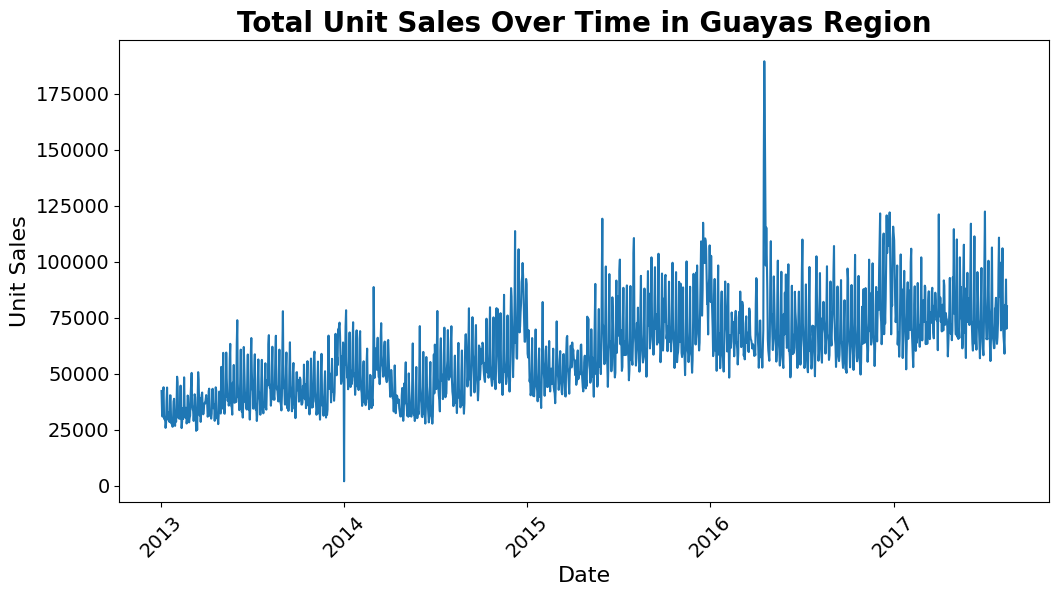

In [49]:
# Aggregating total sales by date
sales_by_date = df_train.groupby('date')['unit_sales'].sum()

# Plotting the time-series
plt.figure(figsize=(12,6))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.title('Total Unit Sales Over Time in Guayas Region', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Unit Sales', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.show()

###Sales Trend by Year and Month

In [50]:
# Aggregating sales by year and month
sales_by_month = df_train.groupby(['year', 'month'])['unit_sales'].sum().unstack()

In [51]:
sales_by_month

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,985816.000,963374.000,1126816.000,1064720.000,1304490.000,1322507.000,1272269.000,1449398.000,1321202.000,1283535.000,1224938.000,1617073.000
2014,1606597.284,1244166.000,1756789.875,1167219.086,1191326.104,1195433.436,1572924.145,1413351.128,1639377.080,1706047.065,1746691.571,2315496.978
2015,1479434.799,1415871.851,1605824.582,1562518.753,1905258.601,1955912.032,2077212.503,2134624.519,2201828.707,2239073.671,2038885.207,2632298.877
2016,2122601.422,1965544.737,2064289.713,2510966.950,2235713.457,1985978.396,2143978.484,2180870.654,2036357.180,2125248.929,2185801.524,2809818.408
2017,2318440.020,2066607.343,2355300.270,2327855.269,2466776.470,2247466.132,2427228.829,1184526.522,NaN,NaN,NaN,NaN


In [52]:
df_train.isnull().sum()

,0
id,0
date,0
store_nbr,0
item_nbr,0
unit_sales,0
onpromotion,0
year,0
month,0
day,0
day_of_week,0


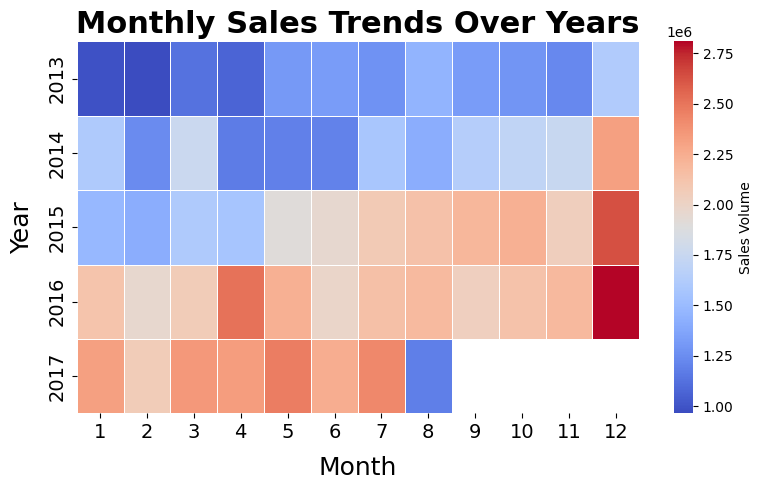

In [53]:
# Plotting heatmap of sales by year and month
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  # Increase figure size for better visibility
sns.heatmap(
    sales_by_month,
    cmap='coolwarm',  # Use a diverging colormap for better contrast
    linewidths=0.5,  # Add lines between cells for clarity
    linecolor='white',  # Use white lines for a cleaner look
    cbar_kws={'label': 'Sales Volume'}  # Add a descriptive colorbar label
)

# Customizing title and axes labels
plt.title('Monthly Sales Trends Over Years', fontsize=22, fontweight='bold')
plt.xlabel('Month', fontsize=18, labelpad=10)  # Labelpad adds spacing
plt.ylabel('Year', fontsize=18, labelpad=10)

# Formatting tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Display the heatmap
plt.show()

###Examining the Impact of Holidays

In [54]:
df_holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [55]:
# Convert date column to datetime
df_holidays_events['date'] = pd.to_datetime(df_holidays_events['date'])
print("Holidays range: from",df_holidays_events['date'].dt.date.min(),"till",df_holidays_events['date'].dt.date.max())

Holidays range: from 2012-03-02 till 2017-12-26


In [56]:
# Merging df_train data with holidays
df_train_holiday = pd.merge(df_train, df_holidays_events, on='date', how='left')

In [57]:
df_holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [58]:
df_train_holiday.head(14)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,day,day_of_week,type,locale,locale_name,description,transferred
0,18790,2013-01-02,24,105574,12.0,False,2013,1,2,2,NaN,NaN,NaN,NaN,NaN
1,18791,2013-01-02,24,105575,2.0,False,2013,1,2,2,NaN,NaN,NaN,NaN,NaN
2,18792,2013-01-02,24,105577,1.0,False,2013,1,2,2,NaN,NaN,NaN,NaN,NaN
3,18793,2013-01-02,24,105693,7.0,False,2013,1,2,2,NaN,NaN,NaN,NaN,NaN
4,18794,2013-01-02,24,105737,17.0,False,2013,1,2,2,NaN,NaN,NaN,NaN,NaN
5,18795,2013-01-02,24,105857,1.0,False,2013,1,2,2,NaN,NaN,NaN,NaN,NaN
6,18796,2013-01-02,24,106716,3.0,False,2013,1,2,2,NaN,NaN,NaN,NaN,NaN
7,18799,2013-01-02,24,108786,3.0,False,2013,1,2,2,NaN,NaN,NaN,NaN,NaN
8,18800,2013-01-02,24,108797,2.0,False,2013,1,2,2,NaN,NaN,NaN,NaN,NaN
9,18802,2013-01-02,24,108862,3.0,False,2013,1,2,2,NaN,NaN,NaN,NaN,NaN


In [59]:
df_train_holiday.isnull().sum()

,0
id,0
date,0
store_nbr,0
item_nbr,0
unit_sales,0
onpromotion,0
year,0
month,0
day,0
day_of_week,0


In [60]:
df_train_holiday.shape

(15033129, 15)

In [61]:
df_train_holiday['type'].unique()

array([nan, 'Work Day', 'Holiday', 'Additional', 'Event', 'Transfer',
       'Bridge'], dtype=object)

In [62]:
df_holidays_events['type'].unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [63]:
df_train.head(14)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,year,month,day,day_of_week
1,18790,2013-01-02,24,105574,12.0,False,2013,1,2,2
2,18791,2013-01-02,24,105575,2.0,False,2013,1,2,2
3,18792,2013-01-02,24,105577,1.0,False,2013,1,2,2
4,18793,2013-01-02,24,105693,7.0,False,2013,1,2,2
5,18794,2013-01-02,24,105737,17.0,False,2013,1,2,2
6,18795,2013-01-02,24,105857,1.0,False,2013,1,2,2
7,18796,2013-01-02,24,106716,3.0,False,2013,1,2,2
10,18799,2013-01-02,24,108786,3.0,False,2013,1,2,2
11,18800,2013-01-02,24,108797,2.0,False,2013,1,2,2
13,18802,2013-01-02,24,108862,3.0,False,2013,1,2,2


In [64]:
df_holidays_events[df_holidays_events['type']=='Work Day'].head(5)

,date,type,locale,locale_name,description,transferred
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
149,2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad,False
161,2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano,False
283,2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False


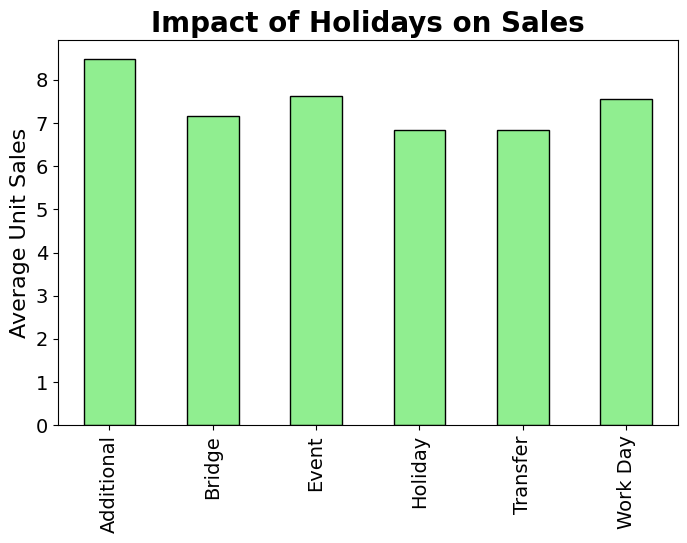

In [65]:
# Aggregating sales by holiday and non-holiday
holiday_sales = df_train_holiday.groupby('type')['unit_sales'].mean()

# Plotting holiday impact
plt.figure(figsize=(8,5))
holiday_sales.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Impact of Holidays on Sales', fontsize=20, fontweight='bold')
plt.ylabel('Average Unit Sales', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

###Analyzing Perishable Items

Perishable items are products that have a limited shelf life and must be sold within a short time to avoid spoilage or waste. These include fresh produce, dairy products, meats, and bakery goods, among others. In grocery stores like Corporación Favorita (from the Kaggle dataset you’re working with), perishable items are often critical because they require more careful inventory management and sales forecasting.
The first step would be to merge training data with the items data and set the proper (boolean) type for the 'perishable' column:

In [66]:
# Merging df_train with items to get perishable data
df_train_items = pd.merge(df_train, df_items, on='item_nbr', how='left')
df_train_items['perishable'] = df_train_items['perishable'].astype(bool)

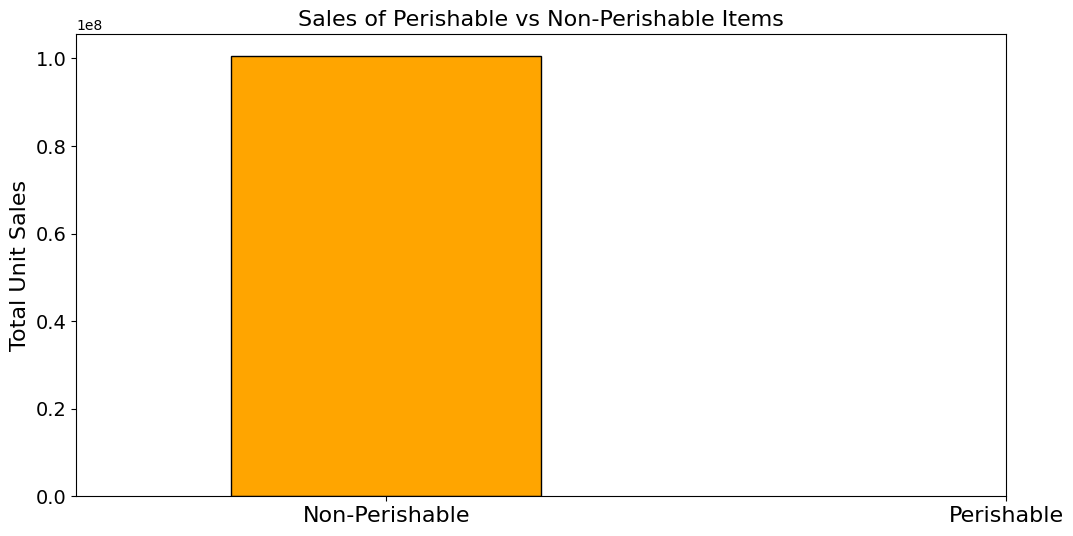

In [67]:
# Aggregating sales by perishable and non-perishable items
perishable_sales = df_train_items.groupby('perishable')['unit_sales'].sum()

# Plotting sales for perishable and non-perishable items
plt.figure(figsize=(12,6))
perishable_sales.plot(kind='bar', color=['orange', 'green'], edgecolor='black')
plt.title('Sales of Perishable vs Non-Perishable Items', fontsize=16)
plt.ylabel('Total Unit Sales', fontsize=16)
plt.xlabel('')
plt.xticks(
    ticks=[0, 1],
    labels=['Non-Perishable', 'Perishable'],
    fontsize=16,
    rotation=0  # Keep x-axis labels horizontal
)
plt.yticks(fontsize=14)
plt.show()

In [68]:
perishable_sales

,unit_sales
perishable,
False,1.005017e+08
